# Logistic Regression to Identify Handwritten Digits
In this notebook we will use logistic regression to identify handwritten objects, the dataset to be used is the famous MNIST developed by Yan Le Cunn and is used as a benchmark to test performance of classification algorithms. The dataset and its description can be downloaded [here](http://yann.lecun.com/exdb/mnist/)

In [1]:
from __future__ import absolute_import, division, print_function
import os
import platform
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Dataset Description
This dataset consist of 28x28 px grayscale images, this images are vectorized, e.g., each row of a matrix in conacatenated so that the image can be represented as a 784 dimensional vector. The original dataset contains digits from 0 to 9.

## Importing Training Dataset
The files are stored in a compressed format, and we have a different file for the features (784) and the labels (0-9).

In [2]:
def read_mnist_images(filename):
    import struct
    import gzip
    with gzip.open(filename) as f:
        buf = f.read(16)
        magic, n_items, xsize, ysize = struct.unpack(">iiii", buf)
        assert magic == 2051
        n_features = xsize*ysize
        data = np.zeros((n_items, n_features), dtype=np.uint8)
        for i in range(n_items):
            buf = f.read(n_features)
            x = struct.unpack("B"*n_features, buf)
            data[i, :] = x
    return data

def read_mnist_labels(filename):
    import struct
    import gzip
    with gzip.open(filename) as f:
        buf = f.read(8)
        magic, n_items = struct.unpack(">ii", buf)
        assert magic == 2049
        data = np.zeros(n_items, dtype=np.uint8)
        buf = f.read(n_items)
        data[:] = struct.unpack("B"*n_items, buf)
    return data

mnist_features = read_mnist_images('train-images-idx3-ubyte.gz')
mnist_labels = read_mnist_labels('train-labels-idx1-ubyte.gz')
test_mnist_features = read_mnist_images('t10k-images-idx3-ubyte.gz')
test_mnist_labels = read_mnist_labels('t10k-labels-idx1-ubyte.gz')

## Displaying some sample data

[6]


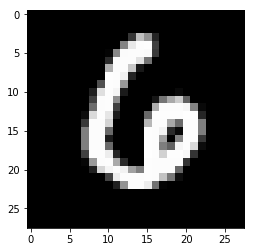

In [3]:
img_num = np.random.randint(mnist_features.shape[0], size=1)
image_test = mnist_features[img_num].reshape((28,28))
imgplot = plt.imshow(image_test, cmap="gray")
print(mnist_labels[img_num])
plt.show()

Add a column of ones to the features to act as an intercept term

In [4]:
mnist_features = np.c_[np.ones(mnist_features.shape[0]), mnist_features]

We need to hot encode the labels, e.g., to transform a digit (0-9) to a binary vector

In [5]:
mnist_labels_he = np.eye(10)[mnist_labels]

## Training Parameters

In [6]:
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1],dtype=float)
display_step = 10

## Variables and placeholders

In [7]:
n_dim = mnist_features.shape[1]
x = tf.placeholder(tf.float32, shape=mnist_features.shape, name="x") # MNIST data image 28x28 px
y = tf.placeholder(tf.float32, shape=mnist_labels_he.shape, name="y") # Hot encoded bit
W = tf.Variable(tf.zeros([n_dim,10]))

## Define the model

In [8]:
pred = tf.matmul(x,W)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

## Training Time

In [9]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(optimizer, feed_dict={x:mnist_features,y:mnist_labels_he})
    c = sess.run(cost, feed_dict={x:mnist_features,y:mnist_labels_he})
    cost_history = np.append(cost_history, c)
    y_pred = sess.run(pred, feed_dict={x:mnist_features})
    if (epoch+1) % display_step == 0:
        print("Epoch:",'%04d' % (epoch+1), "cost=", c)
print ("Optimization Finished!")

Epoch: 0010 cost= 11927.2
Epoch: 0020 cost= 1212.11
Epoch: 0030 cost= 864.03
Epoch: 0040 cost= 1153.68
Epoch: 0050 cost= 1343.2
Epoch: 0060 cost= 4223.75
Epoch: 0070 cost= 616.448
Epoch: 0080 cost= 533.441
Epoch: 0090 cost= 3678.59
Epoch: 0100 cost= 644.591
Optimization Finished!


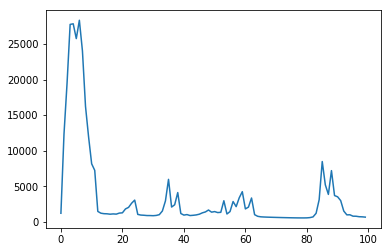

In [10]:
plt.plot(range(training_epochs), cost_history[1:])
plt.show()

In [11]:
predictions = sess.run(tf.nn.softmax(tf.matmul(x,W)), feed_dict={x:mnist_features})
correct = tf.equal(tf.argmax(predictions,1), tf.argmax(mnist_labels_he,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
print(sess.run(accuracy)*100,"%")

89.7416651249 %


4 [4]


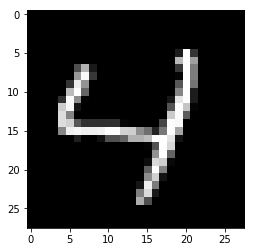

In [12]:
img_num = np.random.randint(mnist_features.shape[0], size=1)
image_test = mnist_features[img_num,1:].reshape((28,28))
imgplot = plt.imshow(image_test,cmap="gray")
print(np.argmax(predictions[img_num]), mnist_labels[img_num])
plt.show()

## Testing

In [ ]:
test_mnist_features = np.c_[np.ones(test_mnist_features.shape[0]), test_mnist_features]
test_mnist_labels_he = np.eye(10)[test_mnist_labels]

In [18]:
x_test = tf.placeholder(tf.float32, shape=test_mnist_features.shape, name="x_test")
predictions = sess.run(tf.nn.softmax(tf.matmul(x_test,W)), feed_dict={x_test:test_mnist_features})
correct = tf.equal(tf.argmax(predictions,1), tf.argmax(test_mnist_labels_he,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
print(sess.run(accuracy)*100,"%")

89.9699985981 %
